In [17]:
import pandas as pd
import numpy as np
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import time

In [2]:
epochcount = 1000

In [3]:
df = pd.read_csv('data/price_informations.csv')

In [4]:
df = df.loc[:112]

In [5]:
df

,Date,Close,Open,High,Low,Vol,Change %
0,7-Nov-10,0.3,0.4,0.5,0.1,341460.0,-0.29
1,14-Nov-10,0.3,0.3,0.3,0.2,146410.0,0.00
2,21-Nov-10,0.3,0.3,0.3,0.3,73380.0,0.00
3,28-Nov-10,0.2,0.3,0.3,0.2,136930.0,-0.28
4,5-Dec-10,0.2,0.2,0.2,0.2,66890.0,0.00
...,...,...,...,...,...,...,...
108,2-Dec-12,13.4,12.6,13.7,12.4,226350.0,0.07
109,9-Dec-12,13.5,13.4,13.9,13.0,228090.0,0.01
110,16-Dec-12,13.4,13.5,13.7,12.8,241510.0,-0.01
111,23-Dec-12,13.4,13.4,13.7,13.0,139460.0,0.00


In [6]:
dates = df["Date"]
df.drop("Date",axis= 1, inplace = True)

In [7]:
Y = df["Close"]
X = df.drop(["Close"],axis=1)

In [8]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = X[:75], X[75:], Y[:75],  Y[75:]

In [10]:
X_train.shape

(75, 5)

In [11]:
trainX = np.array(X_train)
testX = np.array(X_test)

In [12]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [13]:
trainX.shape

(75, 1, 5)

In [14]:
model = Sequential()  

model.add(LSTM(units = 30, activation = 'relu', return_sequences = True, input_shape = (1,5)))
model.add(Dropout(0.15))

model.add(LSTM(units = 40, activation = 'relu', return_sequences = True))
model.add(Dropout(0.15))

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.15))

model.add(LSTM(units = 60, activation = 'relu'))
model.add(Dropout(0.15))

model.add(Dense(units= 1))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 30)             4320      
_________________________________________________________________
dropout (Dropout)            (None, 1, 30)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 40)             11360     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 40)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 50)             18200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60)                2

In [21]:
model.fit(trainX, y_train, epochs=epochcount, batch_size=1, verbose=2)

Epoch 1/1000
75/75 - 0s - loss: 0.5351
Epoch 2/1000
75/75 - 0s - loss: 0.5626
Epoch 3/1000
75/75 - 0s - loss: 0.4886
Epoch 4/1000
75/75 - 0s - loss: 0.5266
Epoch 5/1000
75/75 - 0s - loss: 0.5345
Epoch 6/1000
75/75 - 0s - loss: 0.5920
Epoch 7/1000
75/75 - 0s - loss: 0.4439
Epoch 8/1000
75/75 - 0s - loss: 0.5360
Epoch 9/1000
75/75 - 0s - loss: 0.4989
Epoch 10/1000
75/75 - 0s - loss: 0.5925
Epoch 11/1000
75/75 - 0s - loss: 0.5635
Epoch 12/1000
75/75 - 0s - loss: 0.6103
Epoch 13/1000
75/75 - 0s - loss: 0.5524
Epoch 14/1000
75/75 - 0s - loss: 0.6487
Epoch 15/1000
75/75 - 0s - loss: 0.4961
Epoch 16/1000
75/75 - 0s - loss: 0.5631
Epoch 17/1000
75/75 - 0s - loss: 0.5595


In [22]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
#calculate MAE
trainScore=mae(y_train, trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore=mae(y_test, testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))
#calculate MAPE
trainScore=mape(y_train, trainPredict[:,0])
print('Train Score: %.2f MAPE' % (trainScore))
testScore=mape(y_test, testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScore))

Train Score: 0.41 RMSE
Test Score: 0.73 RMSE
Train Score: 0.28 MAE
Test Score: 0.66 MAE
Train Score: 0.13 MAPE
Test Score: 0.07 MAPE


KeyError: 'val_loss'

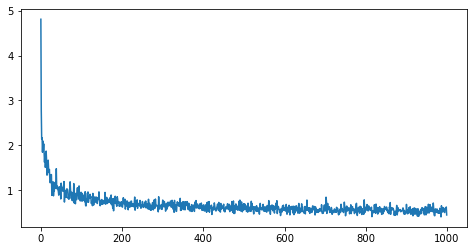

In [20]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
testPredict.reshape(testPredict.shape[0])

In [ ]:
testPredict.shape

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(trainPredict.shape[0]),trainPredict.reshape(trainPredict.shape[0]), c="r", label="Prediction")
plt.plot(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.scatter(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

In [ ]:
test_predict = testPredict.reshape(testPredict.shape[0])[:-1]
train_predict = trainPredict.reshape(trainPredict.shape[0])[:-1]

In [ ]:
y_test_ = y_test

In [ ]:
df = pd.read_csv('data/full_df.csv').drop("number_of_edges", axis=1).drop("number_of_nodes",axis=1)

In [ ]:
df

In [ ]:
dates = df["Date"]
df.drop("Date",axis= 1, inplace = True)
Y = df["Close"]
X = df.drop(["Close"],axis=1)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test =  X[:75], X[75:], Y[:75],  Y[75:]
trainX = np.array(X_train)
testX = np.array(X_test)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [ ]:
model = Sequential()  

model.add(LSTM(units = 30, activation = 'relu', return_sequences = True, input_shape = (1,8)))
model.add(Dropout(0.15))

model.add(LSTM(units = 40, activation = 'relu', return_sequences = True))
model.add(Dropout(0.15))

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.15))

model.add(LSTM(units = 60, activation = 'relu'))
model.add(Dropout(0.15))

model.add(Dense(units= 1))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [ ]:
model.summary()

In [ ]:
history = model.fit(trainX, y_train, epochs=epochcount,callbacks=[EarlyStopping(monitor='val_loss', patience=10)], batch_size=1, verbose=2)

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
#calculate MAE
trainScore=mae(y_train, trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore=mae(y_test, testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))
#calculate MAPE
trainScore=mape(y_train, trainPredict[:,0])
print('Train Score: %.2f MAPE' % (trainScore))
testScore=mape(y_test.values, testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScore))

In [ ]:
plt.figure(figsize=(16,9))
lenght = np.arange(37)
plt.plot(lenght,testPredict.reshape(testPredict.shape[0]), c="r",label="Prediction with Graph Metrics")
plt.plot(lenght,y_test, c="g", label="Bitcoin Price")
plt.plot(lenght,test_predict, c="b", label="Prediction withot Graph Metrics")
plt.legend()
plt.title("Price Predictions")
plt.ylabel("Price")
plt.xlabel("Weeks")
plt.savefig("demo16_1500.png")
plt.show()

In [ ]:
plt.figure(figsize=(16,9))
lenght = np.arange(16)
plt.plot(lenght,testPredict.reshape(testPredict.shape[0])[:16], c="r",label="Prediction with Graph Metrics")
plt.plot(lenght,y_test[:16], c="g", label="Bitcoin Price")
plt.plot(lenght,test_predict[:-1][:16], c="b", label="Prediction withot Graph Metrics")
plt.legend()
plt.title("Price Predictions")
plt.ylabel("Price")
plt.xlabel("Weeks")
plt.savefig("demo37_1500.png")
plt.show()

In [ ]:
plt.figure(figsize=(16,9))
plt.title("Price prediction of train data")
plt.plot(np.arange(trainPredict.shape[0]),trainPredict.reshape(trainPredict.shape[0]), c="r",label="Prediction with graph metrics")
plt.plot(np.arange(trainPredict.shape[0]),y_train, c="g", label="Bitcoin Price")
plt.plot(np.arange(train_predict.shape[0]),train_predict.reshape(train_predict.shape[0]), c="b",label="Prediction without graph metrics")
plt.xlabel("Weeks")
plt.ylabel("Price")
plt.legend()
plt.savefig("demotrain.png")

plt.show()

In [27]:
from ann.visualizer.visualize import ann_viz

ModuleNotFoundError: No module named 'ann'